In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',200)

In [3]:
df = pd.read_excel('Data_Train.xlsx')
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df['Total_Stops'].mode()

0    1 stop
dtype: object

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [11]:
def datetime_converter(col):
    df[col] = pd.to_datetime(df[col])

In [12]:
#covert into datetime format 
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    datetime_converter(i)

In [13]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
#to acces day from particular colmn
df['journey_day'] = df['Date_of_Journey'].dt.day
df['journey_month'] = df['Date_of_Journey'].dt.month

In [15]:
df.drop('Date_of_Journey',axis = 1,inplace  = True)

In [16]:
df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-04-16 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-16 05:50:00,2021-04-16 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-16 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9


In [17]:
def extract_hour(col):
    df[col+'_hour'] = df[col].dt.hour
    
def extract_min(col):
    df[col+'_min'] = df[col].dt.minute
    
def drop_col(df,col):
    df.drop(col,axis =1,inplace = True)

In [18]:
extract_hour('Dep_Time')
extract_min('Dep_Time')
drop_col(df,'Dep_Time')

In [19]:
df.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-16 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25


In [20]:
extract_hour('Arrival_Time')
extract_min('Arrival_Time')
drop_col(df,'Arrival_Time')

In [21]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25


In [22]:
duration=list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only second, Adds 0 hour
    

In [23]:
df['Duration']=duration

In [24]:
#handeling 
df.Duration.isnull().sum()

0

In [25]:
df['Duration'][0].split(' ')[1][:-1]

'50'

In [26]:
#accesing hour 
def hour(col):
    return col.split(' ')[0][:-1]
    

In [27]:
#accesing min
 
def minute(x):
    return x.split(' ')[1][0:-1]
    

In [28]:
#applying in particular column
df['duration_hour']=df['Duration'].apply(hour)


In [29]:
df['duration_min']=df['Duration'].apply(minute)

In [30]:
drop_col(df,'Duration')

In [31]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
duration_hour        object
duration_min         object
dtype: object

In [32]:
#here we see duration min and hour is object but it shuold be int type
df['duration_hour'] = df['duration_hour'].astype(int)
df['duration_min'] = df['duration_min'].astype(int)

In [33]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
duration_hour         int64
duration_min          int64
dtype: object

In [34]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25


In [35]:
cat_col = [col for col in df.columns if df[col].dtypes == 'O']

In [36]:
num_col = [col for col in df.columns if df[col].dtypes != 'O']

In [37]:
num_df = df[num_col]

In [38]:
print('categorical : ',cat_col)
print('\n')
print('numerical : ',num_col)

categorical :  ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


numerical :  ['Price', 'journey_day', 'journey_month', 'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour', 'Arrival_Time_min', 'duration_hour', 'duration_min']


In [39]:
#nominal data : which are not oredered we do "one hot encoding "
#ordinal data : ordered data we do " label encoding "

In [40]:
#So we need to do one hot encoding for categorical features 
cat_df = df[cat_col]
cat_df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info


In [41]:
cat_df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

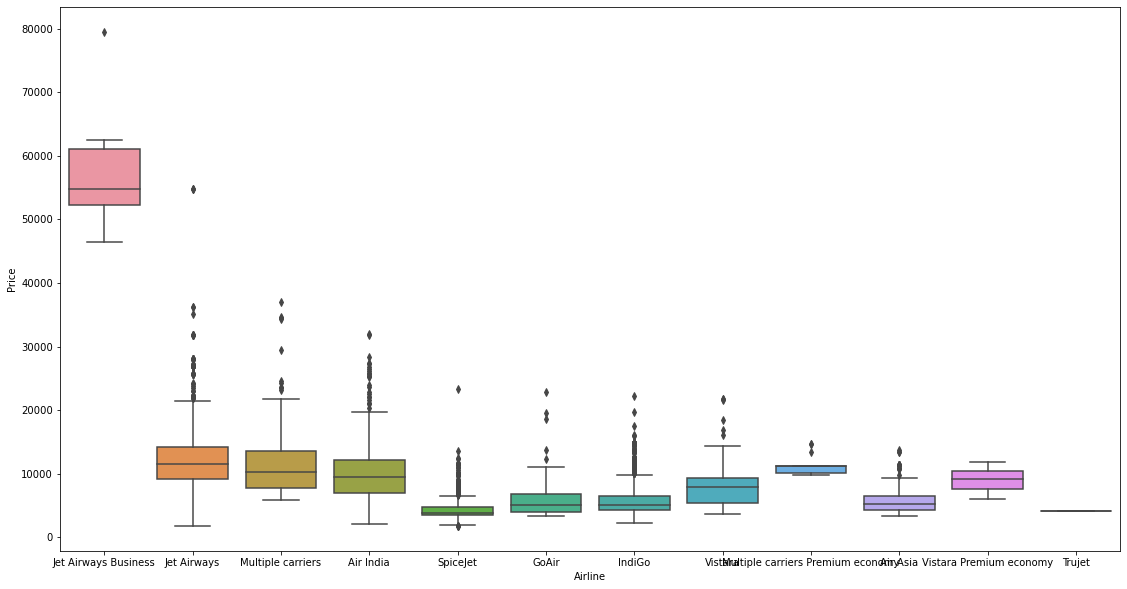

In [42]:
plt.figure(figsize=(19,10))
sns.boxplot(x='Airline',y = 'Price',data=df.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Source', ylabel='Price'>

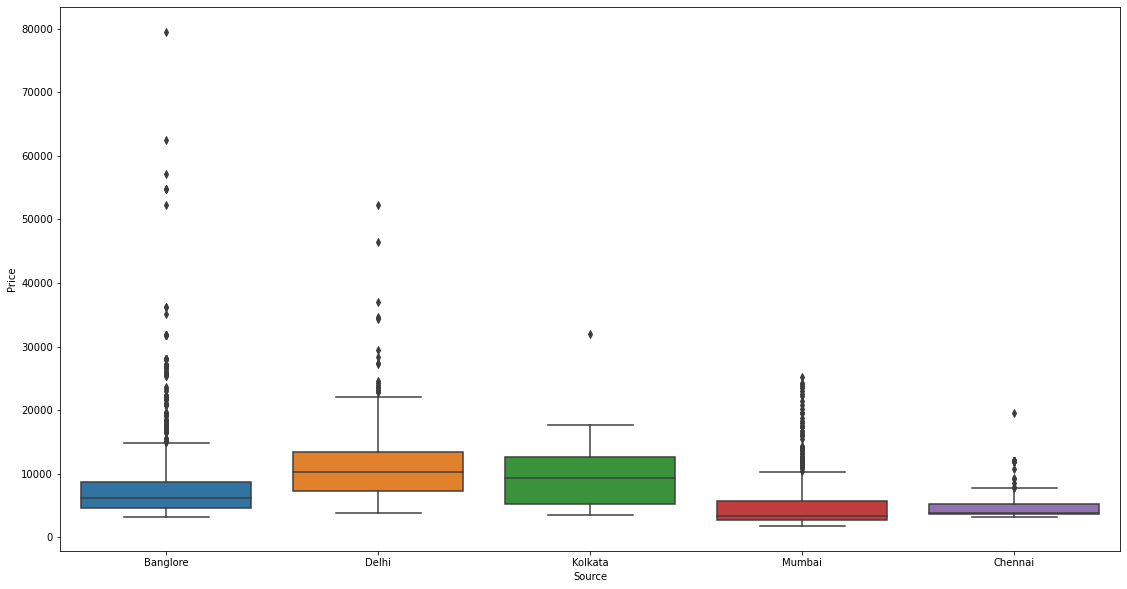

In [43]:
plt.figure(figsize=(19,10))
sns.boxplot(x='Source',y = 'Price',data=df.sort_values('Price',ascending=False))
#delhi has highest source and bangalore has high fluctuation rate 

In [44]:
Airlines = pd.get_dummies(df['Airline'],drop_first=True)
Airlines

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [45]:
destination = pd.get_dummies(df.Destination , drop_first=True)
destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [46]:
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [47]:
source = pd.get_dummies(df.Source,drop_first=True)
source.head(2)

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0


In [48]:
cat_df['Route'].str.split('→').str[0]

0        BLR 
1        CCU 
2        DEL 
3        CCU 
4        BLR 
         ... 
10678    CCU 
10679    CCU 
10680    BLR 
10681    BLR 
10682    DEL 
Name: Route, Length: 10682, dtype: object

In [49]:
cat_df['route_1'] = cat_df['Route'].str.split('→').str[0]
cat_df['route_2'] = cat_df['Route'].str.split('→').str[1]
cat_df['route_3'] = cat_df['Route'].str.split('→').str[2]
cat_df['route_4'] = cat_df['Route'].str.split('→').str[3]
cat_df['route_5'] = cat_df['Route'].str.split('→').str[4]

In [50]:
cat_df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN


In [51]:
drop_col(cat_df,'Route')

In [52]:
cat_df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN


In [53]:
#to treat null values
for i in ['route_3','route_4','route_5']:
    cat_df[i].fillna('None',inplace = True)

In [54]:
cat_df.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,None,None


In [55]:
cat_df.dtypes

Airline            object
Source             object
Destination        object
Total_Stops        object
Additional_Info    object
route_1            object
route_2            object
route_3            object
route_4            object
route_5            object
dtype: object

In [56]:
len(cat_df['Airline'].value_counts())

12

In [57]:
#want to print no of categories of each col
for i in cat_df:
    print('{} has {} of categories '.format(i,len(cat_df[i].value_counts())))

Airline has 12 of categories 
Source has 5 of categories 
Destination has 6 of categories 
Total_Stops has 5 of categories 
Additional_Info has 10 of categories 
route_1 has 5 of categories 
route_2 has 45 of categories 
route_3 has 30 of categories 
route_4 has 14 of categories 
route_5 has 6 of categories 


In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [59]:
cat_df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'route_1', 'route_2', 'route_3', 'route_4', 'route_5'],
      dtype='object')

In [60]:
for i in ['route_1', 'route_2', 'route_3', 'route_4', 'route_5']:
    cat_df[i] = le.fit_transform(cat_df[i])

In [61]:
cat_df.head(4)

,Airline,Source,Destination,Total_Stops,Additional_Info,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5


In [62]:
drop_col(cat_df,'Additional_Info')

In [63]:
cat_df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [64]:
#replace values with custom values in totalstop col
dict = {'non-stop':0, '1 stop':1, '2 stops':2,'3 stops':3,'4 stops':4}

cat_df['Total_Stops'] = cat_df['Total_Stops'].map(dict)

In [65]:
cat_df.Total_Stops.unique()

array([0, 2, 1, 3, 4])

In [66]:
cat_df.isnull().sum()

Airline        0
Source         0
Destination    0
Total_Stops    0
route_1        0
route_2        0
route_3        0
route_4        0
route_5        0
dtype: int64

In [67]:
cat_df.head(3)

,Airline,Source,Destination,Total_Stops,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5


In [68]:
df = pd.concat([num_df,Airlines,source,destination,cat_df],axis = 1)

In [69]:
df.head(3)

,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Airline,Source,Destination,Total_Stops,route_1,route_2,route_3,route_4,route_5
0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,13882,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,Jet Airways,Delhi,Cochin,2,3,32,4,5,5


In [70]:
drop_col(df,'Source')
drop_col(df,'Airline')
drop_col(df,'Destination')


In [71]:
df.head()

,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,route_1,route_2,route_3,route_4,route_5
0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,29,13,5
1,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,25,1,3,5
2,13882,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,3,32,4,5,5
3,6218,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,34,3,13,5
4,13302,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,34,8,13,5


In [78]:
# checking cols for outlier treatment
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax = ax1)
    sns.boxplot(df[col],ax=ax2)

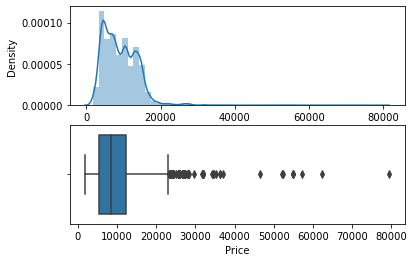

In [77]:
plot(df,'Price')

In [79]:
df.describe()

,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,route_1,route_2,route_3,route_4,route_5
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,9087.214567,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624,0.163921,0.018161,0.192192,0.360326,0.000562,0.111964,0.001217,0.076577,0.000094,0.044842,0.000281,0.035667,0.424640,0.268770,0.065250,0.424640,0.118424,0.065250,0.035667,0.087250,0.824190,2.019378,11.897959,13.232166,11.792080,4.983056
std,4611.548810,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817,0.370221,0.133541,0.394042,0.480117,0.023695,0.315337,0.034866,0.265932,0.009676,0.206966,0.016757,0.185468,0.494311,0.443341,0.246978,0.494311,0.323124,0.246978,0.185468,0.282214,0.675229,1.206239,8.006427,11.302632,2.948124,0.263913
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,4.000000,13.000000,5.000000
50%,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,8.000000,6.000000,13.000000,5.000000
75%,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,14.000000,29.000000,13.000000,5.000000
max,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,44.000000,29.000000,13.000000,5.000000


In [93]:
q3 = df.Price.quantile(0.75)
q3

12373.0

In [94]:
q1 = df.Price.quantile(0.25)
q1

5277.0

In [95]:
iqr = q3-q1

In [96]:
low_lt = q1-1.5*iqr
high_lt = q3 +1.5*iqr

In [101]:
df = df[(df.Price>low_lt )&(df.Price<high_lt)]
pri.describe()

,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,duration_hour,duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,route_1,route_2,route_3,route_4,route_5
count,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.0,10588.000000,10588.000000,10588.000000,10588.000000,10588.00000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000,10588.000000
mean,8897.795618,12.761617,5.566396,12.490839,24.326596,13.358519,24.692577,10.225349,28.331602,0.163959,0.018323,0.193899,0.357669,0.0,0.112014,0.001228,0.077163,0.000094,0.04524,0.000283,0.035984,0.426898,0.271062,0.065357,0.426898,0.119475,0.065357,0.035984,0.081224,0.821402,2.032112,11.918020,13.277201,11.791084,4.982905
std,4069.289138,8.796903,2.973710,5.744769,18.728972,6.855228,16.532637,8.503519,16.964569,0.370256,0.134122,0.395369,0.479337,0.0,0.315398,0.035020,0.266862,0.009718,0.20784,0.016831,0.186259,0.494651,0.444529,0.247166,0.494651,0.324362,0.247166,0.186259,0.273192,0.676368,1.199205,8.004561,11.334917,2.951641,0.265077
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5228.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,4.000000,13.000000,5.000000
50%,8355.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,8.000000,6.000000,13.000000,5.000000
75%,12312.500000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,14.000000,29.000000,13.000000,5.000000
max,23001.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,44.000000,29.000000,13.000000,5.000000


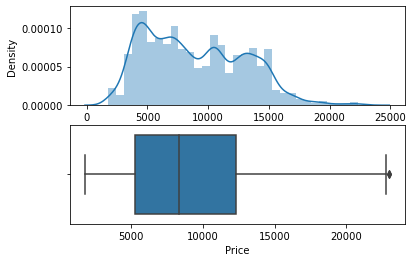

In [102]:
plot(df,'Price')

In [103]:
x = df.drop(['Price'],axis=1)
x.shape

(10588, 34)

In [105]:
y = df['Price']
y.shape

(10588,)

In [106]:
from sklearn.feature_selection import mutual_info_classif


In [107]:
mutual_info_classif(x,y)

array([1.0786187 , 0.8488578 , 1.44415714, 1.20408662, 1.8331443 ,
       1.56032278, 1.7885789 , 1.09408159, 0.76076632, 0.10716634,
       0.6709644 , 0.91071436, 0.        , 0.58764467, 0.01175976,
       0.33180665, 0.        , 0.21664549, 0.        , 0.17543301,
       1.57058786, 0.88028557, 0.30620444, 1.55537867, 0.40884314,
       0.28548065, 0.16634909, 0.36608056, 2.17658498, 2.05375906,
       2.77801795, 2.26663378, 1.49522715, 0.76840984])

In [109]:
imp_df = pd.DataFrame(mutual_info_classif(x,y),index=x.columns)
imp_df

,0
journey_day,1.065986
journey_month,0.860976
Dep_Time_hour,1.477363
Dep_Time_min,1.223913
Arrival_Time_hour,1.834241
Arrival_Time_min,1.568659
duration_hour,1.795600
duration_min,1.079428
Air India,0.769635
GoAir,0.108745


In [110]:
imp_df.columns = ['Score']

In [111]:
imp_df

,Score
journey_day,1.065986
journey_month,0.860976
Dep_Time_hour,1.477363
Dep_Time_min,1.223913
Arrival_Time_hour,1.834241
Arrival_Time_min,1.568659
duration_hour,1.795600
duration_min,1.079428
Air India,0.769635
GoAir,0.108745


In [112]:
#sort descending 
imp_df = imp_df.sort_values(by = 'Score',ascending=False)
imp_df

,Score
route_2,2.810044
route_3,2.310481
Total_Stops,2.165829
route_1,2.020753
Arrival_Time_hour,1.834241
duration_hour,1.795600
Cochin,1.582447
Arrival_Time_min,1.568659
Delhi,1.541034
Dep_Time_hour,1.477363


In [113]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.20,random_state = 0)

In [127]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def prediction(ml_model):
    ml_model = ml_model.fit(xtrain,ytrain)
    print('Training accuracy : {}'.format(ml_model.score(x,y)))
    print('\n')
    ypred = ml_model.predict(xtest)
    print('Predictions : {}'.format(ypred))
    print('\n')
    print('r2 score : {}'.format(r2_score(ytest,ypred)))
    print('\n')
    print('MAE score: {}'.format(mean_absolute_error(ytest,ypred)))
    print('\n')
    print('MSE score: {}'.format(mean_squared_error(ytest,ypred)))
    print('\n')
    print('RMSE score: {}'.format(np.sqrt(mean_absolute_error(ytest,ypred))))
    sns.distplot(ytest - ypred)

In [128]:
from sklearn.ensemble import RandomForestRegressor


Training accuracy : 0.926809928351429


Predictions : [12189.76  10653.758 11694.165 ...  5632.61  12648.06   7374.43 ]


r2 score : 0.8439711561608977


MAE score: 1045.6929604877864


MSE score: 2683756.6721152924


RMSE score: 32.33717613657362


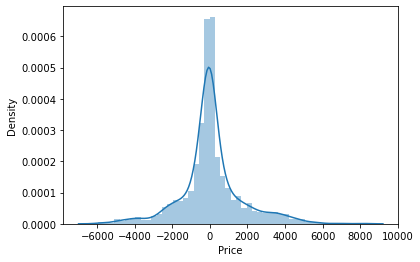

In [129]:
prediction(RandomForestRegressor())

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Training accuracy : 0.6520672098066914


Predictions : [12714.5457495  12836.03374022 13319.95972521 ...  5201.59859872
  9840.94572698  6901.62442767]


r2 score : 0.6554141197260406


MAE score: 1818.3633126871234


MSE score: 5927010.881754671


RMSE score: 42.64227142973417


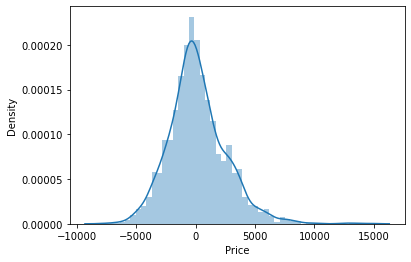

In [132]:
prediction(LinearRegression())

Training accuracy : 0.7755379086497092


Predictions : [15325.6 12593.2 11633.  ...  5159.6 10796.2  9466.4]


r2 score : 0.6921803960219786


MAE score: 1596.977998111426


MSE score: 5294616.659697829


RMSE score: 39.96220712262307


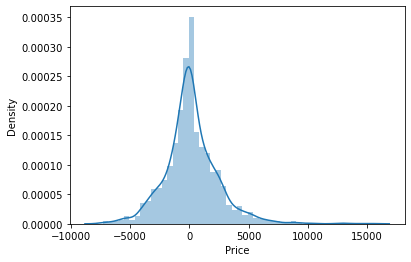

In [133]:
prediction(KNeighborsRegressor())

Training accuracy : 0.9181205531988041


Predictions : [13014.  9796. 11087. ...  5510. 14848.  4832.]


r2 score : 0.7592951756374382


MAE score: 1191.0569562480325


MSE score: 4140216.4016514528


RMSE score: 34.511693036535206


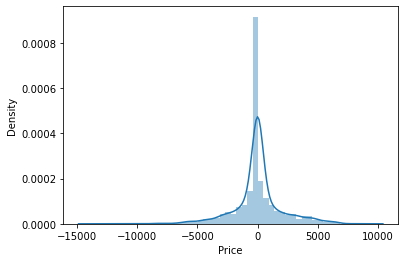

In [134]:
prediction(DecisionTreeRegressor())

In [135]:
from sklearn.model_selection import RandomizedSearchCV

In [137]:
n_estimators = [int(x) for x in np.linspace(100,1200,6)]
max_depth = [int(x) for x in np.linspace(5,30,4)]

In [138]:
#hyper tuning 
random_param = {
    'n_estimators' : n_estimators,
    'max_features' : ['auto','sqrt'],
    'max_depth' : max_depth,
    'min_samples_split' : [5,10,15,100]
}

In [140]:
random_param

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [141]:
model_random = RandomizedSearchCV(estimator = RandomForestRegressor(),
                   param_distributions = random_param,
                   cv = 5,
                   verbose = 2,
                   n_jobs=-1
                  )

In [142]:
model_random.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [143]:
model_random.best_params_

{'n_estimators': 760,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [144]:
rf_pred = model_random.predict(xtest)

In [146]:
print('Accuracy : {}'.format(r2_score(ytest,rf_pred)))

Accuracy : 0.8749066787230759


<AxesSubplot:xlabel='Price', ylabel='Density'>

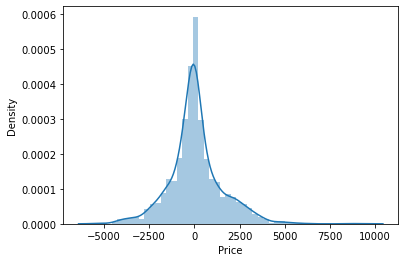

In [147]:
sns.distplot(ytest-rf_pred)

In [148]:
pwd

'/Users/abc/Desktop/MyPc/Desktop/anaconda/AirlineTicketPredictionProject'

In [151]:
import pickle

In [165]:
file = open('random_model.pkl','wb')

In [167]:
pickle.dump(model_random,file)